## INTERNSAVY , DATA SCIENCE

### TASK THREE

Customer Segmentation Analysis with Python

### Problem Overview
In this project, we will perform customer segmentation analysis using Python. Customer segmentation is a crucial strategy for businesses to understand and categorize their customers into distinct groups based on their shared characteristics.
By doing so, companies can tailor their marketing strategies, product offerings, and customer service to better meet the needs and preferences of each segment.

### Objective
Use clustering techniques on a customer dataset to group customers based on their characteristics and behavior, enabling personalized marketing, product recommendations, and improved customer satisfaction and retention.

In [72]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

In [53]:
#Loading the dataset
data = pd.read_csv(r"Mall_Customers.csv")


In [54]:
#lets check the head
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
#the tail
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [56]:
#the colums we are working with
data.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
data.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [60]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
data.duplicated().sum()

0

### Exploratory Data Analysis - EDA 

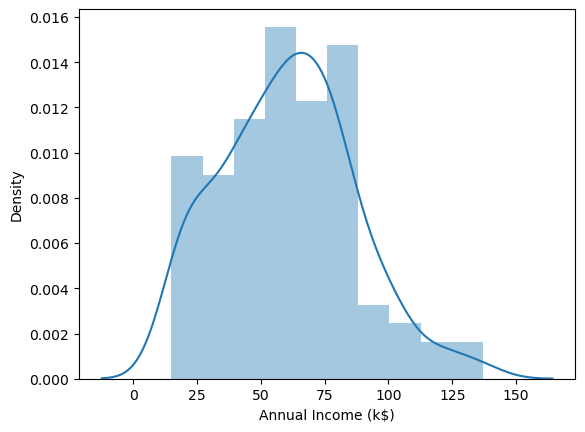

In [62]:
sns.distplot(data['Annual Income (k$)']); 


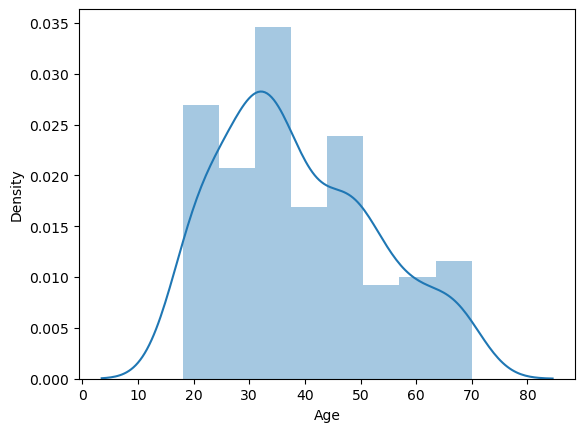

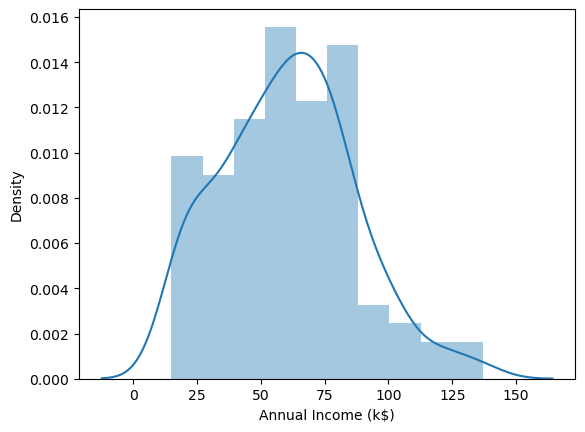

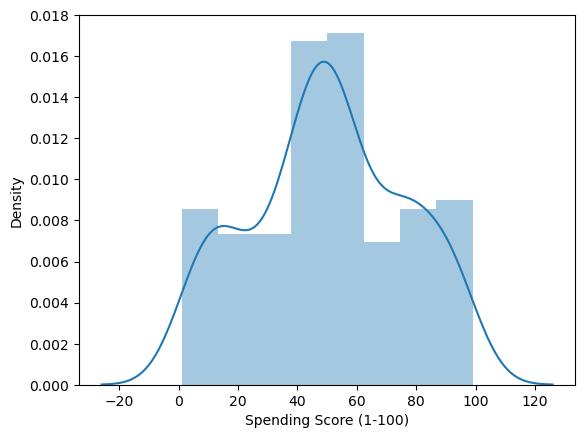

In [63]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i]) 

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

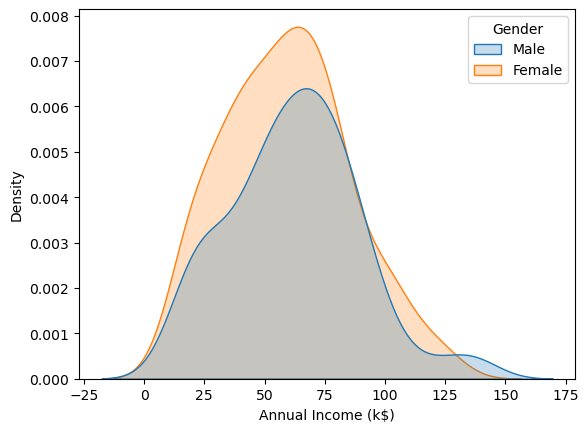

In [64]:
# Use the `hue` parameter to create separate KDE plots for each gender category
sns.kdeplot(data=data, x='Annual Income (k$)', shade=True, hue='Gender')


<Figure size 640x480 with 0 Axes>

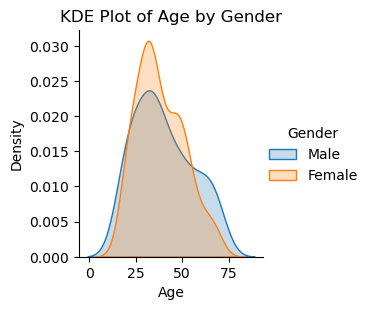

<Figure size 640x480 with 0 Axes>

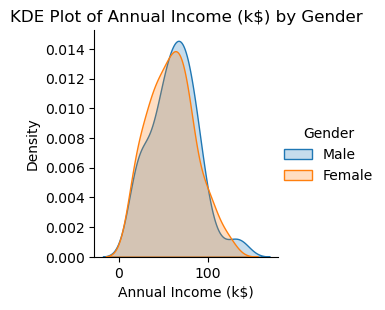

<Figure size 640x480 with 0 Axes>

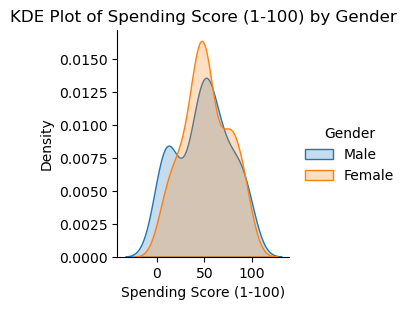

In [65]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    g = sns.FacetGrid(df, hue='Gender', height=3)
    g.map(sns.kdeplot, i, shade=True)
    g.add_legend()
    plt.title(f"KDE Plot of {i} by Gender")
    plt.show()

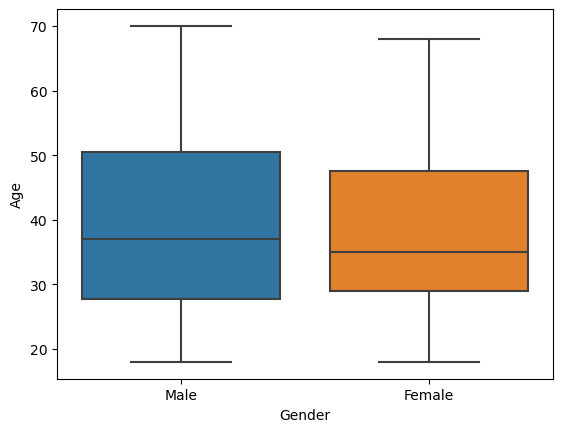

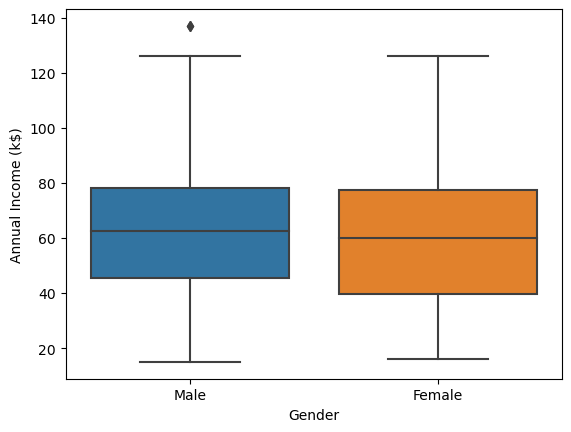

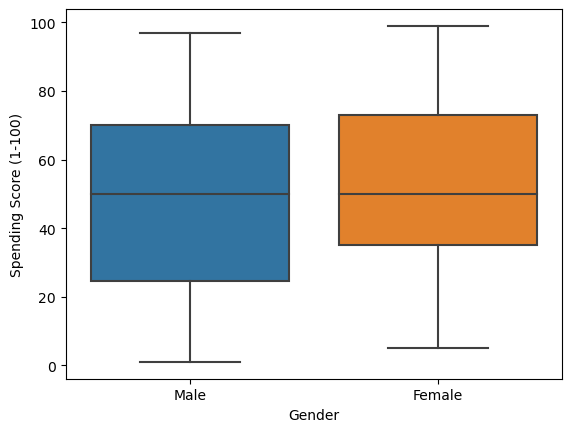

In [66]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [67]:
df['Gender'].value_counts(normalize=True)


Female    0.56
Male      0.44
Name: Gender, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

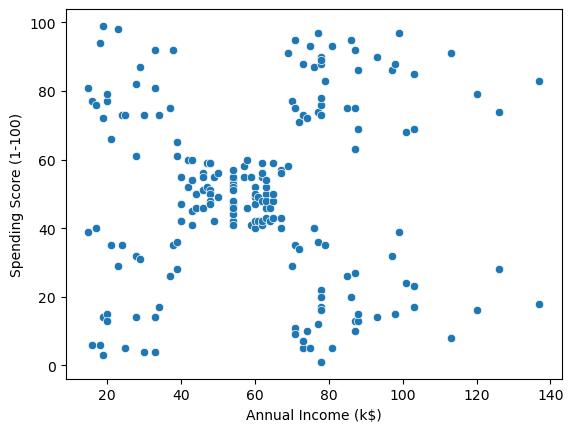

In [68]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )


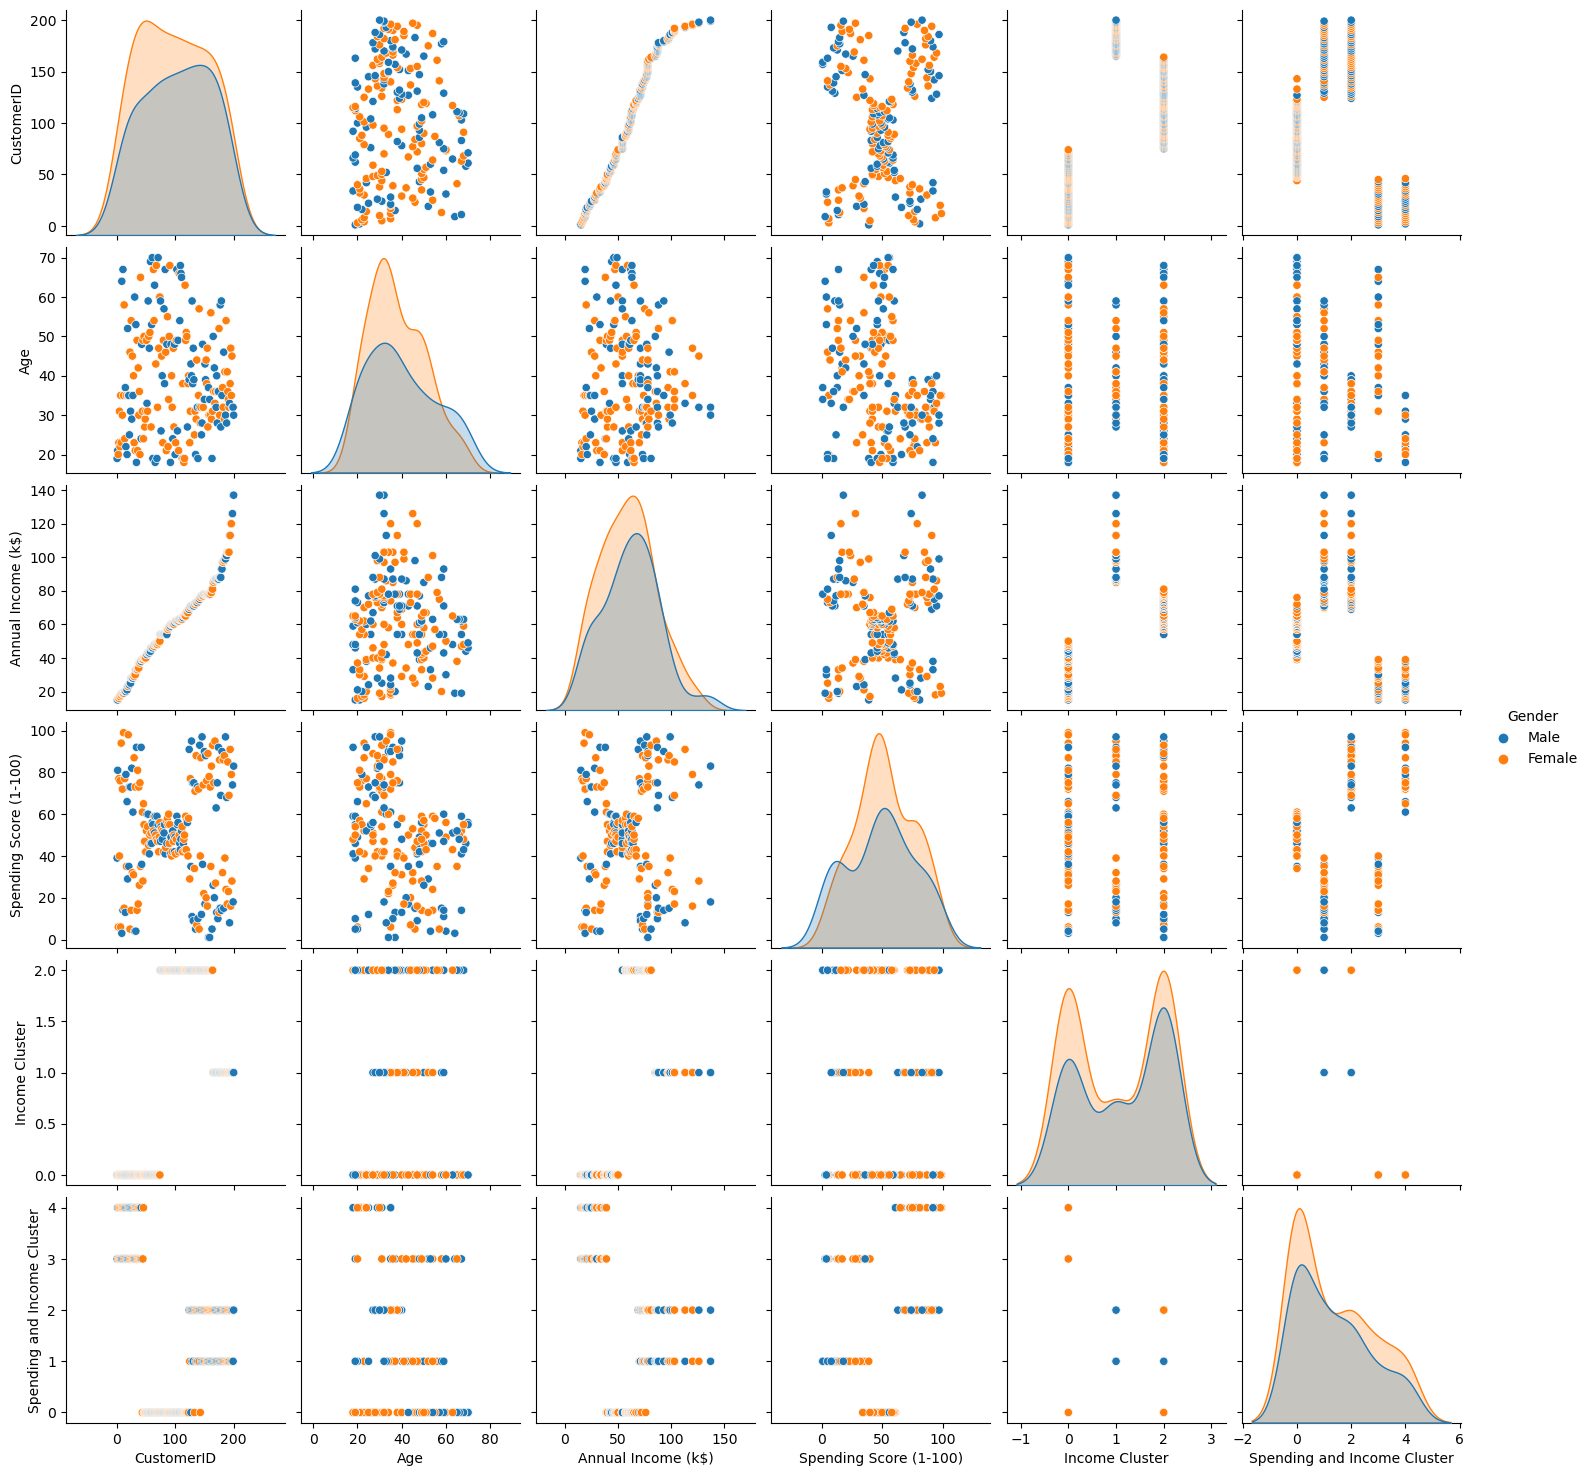

In [69]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(data,hue='Gender')

In [70]:
data.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [21]:
data.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

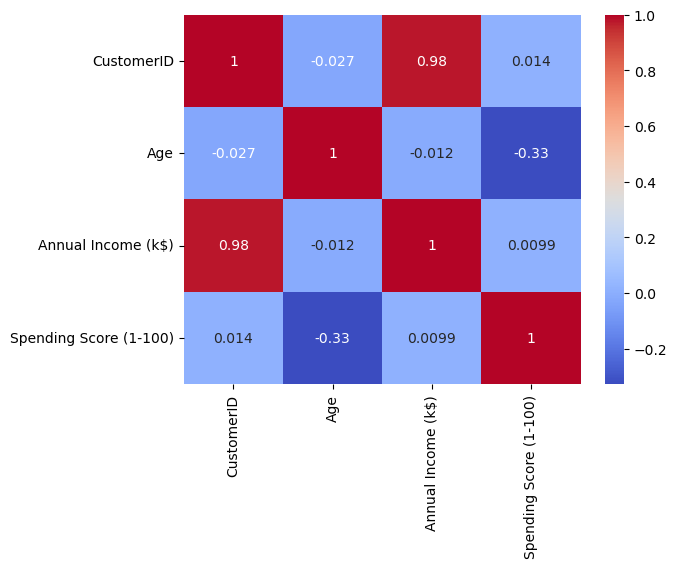

In [22]:
sns.heatmap(dfata.corr(),annot=True,cmap='coolwarm')


In [26]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
KMeans(n_clusters=3)


KMeans(n_clusters=3)

In [27]:
clustering1.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [28]:
data['Income Cluster'] = clustering1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [29]:
data['Income Cluster'].value_counts()


2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [33]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    
    
intertia_scores


[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472487,
 8493.229304029304,
 5081.484660267269,
 3949.2756132756135,
 2822.4996947496943,
 2190.0972210795744,
 1743.4772727272725]

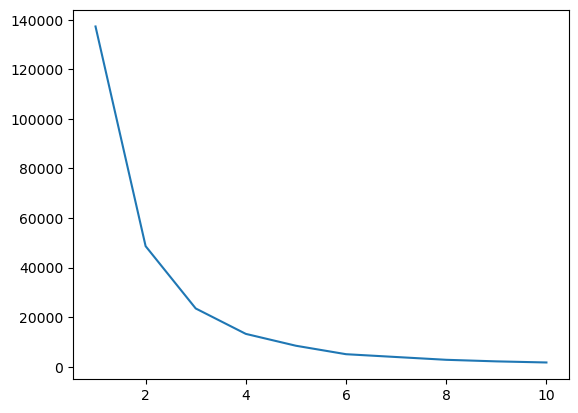

In [34]:
plt.plot(range(1,11),intertia_scores) 

In [35]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [36]:
data.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [39]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending and Income Cluster'] =clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


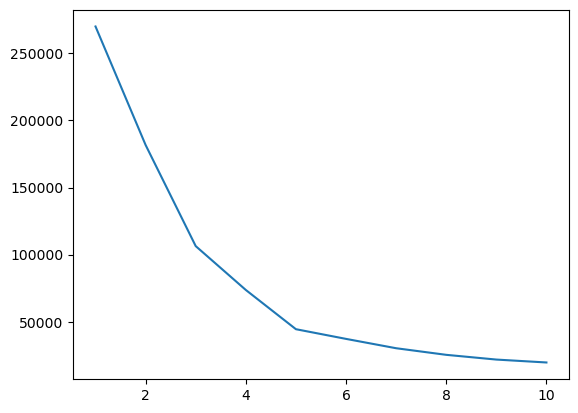

In [37]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

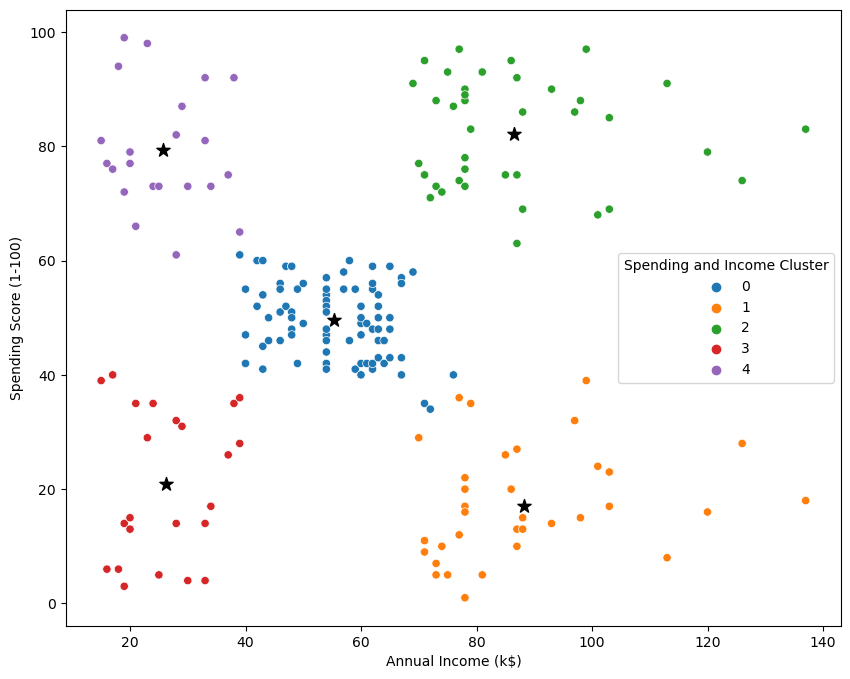

In [40]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [41]:
pd.crosstab(data['Spending and Income Cluster'],data['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [42]:
data.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [43]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [44]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,3,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,3,0


In [45]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,3,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,3,0


In [46]:
dff.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [47]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [48]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


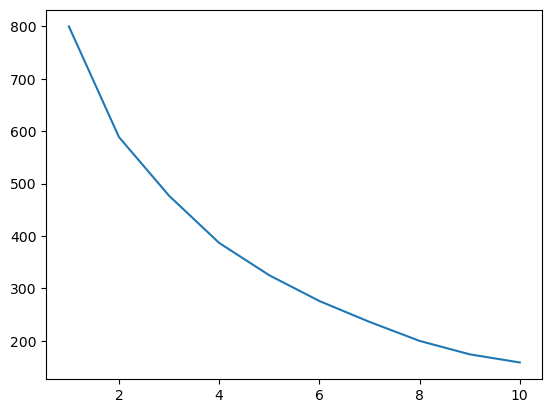

In [49]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [50]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1
